In [1]:
import pandas as pd
import numpy as np


df=pd.read_csv('/content/Facebook Spam Dataset.csv')

df.head()

,profile id,#friends,#following,#community,age,#postshared,#urlshared,#photos/videos,fpurls,fpphotos/videos,avgcomment/post,likes/post,tags/post,#tags/post,Label
0,1,39,300,907,200,1000,850,922,0.490000,0.550000,0.56,0.47,40,14,1
1,2,150,350,30,300,300,100,290,0.330000,0.960000,0.50,1.20,10,4,0
2,3,300,450,50,465,500,150,450,0.200000,0.840000,0.40,1.50,15,7,0
3,4,25,110,660,350,2050,2000,2050,0.975610,1.000000,0.70,0.30,54,21,1
4,5,24,100,150,800,950,1000,900,1.052632,0.947368,0.66,0.50,55,20,1


In [2]:
df.replace('null', np.nan, inplace=True)

df

,profile id,#friends,#following,#community,age,#postshared,#urlshared,#photos/videos,fpurls,fpphotos/videos,avgcomment/post,likes/post,tags/post,#tags/post,Label
0,1,39,300,907,200,1000,850,922,0.490000,0.550000,0.560,0.470,40,14,1
1,2,150,350,30,300,300,100,290,0.330000,0.960000,0.500,1.200,10,4,0
2,3,300,450,50,465,500,150,450,0.200000,0.840000,0.400,1.500,15,7,0
3,4,25,110,660,350,2050,2000,2050,0.975610,1.000000,0.700,0.300,54,21,1
4,5,24,100,150,800,950,1000,900,1.052632,0.947368,0.660,0.500,55,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,597,83,29,510,2000,2994,1876,2990,0.626587,0.998664,0.768,0.154,49,26,1
596,598,93,28,563,2500,3420,2364,3415,0.691228,0.998538,0.659,0.165,47,25,1
597,599,33,27,1000,900,1945,1520,1936,0.781491,0.995373,0.999,0.122,45,23,1
598,600,100,26,1500,800,1876,1320,1874,0.703625,0.998934,1.000,0.102,46,21,0


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

df = pd.read_csv('/content/Facebook Spam Dataset.csv')

imputer = SimpleImputer(strategy='mean')
df['fpurls'] = imputer.fit_transform(df['fpurls'].values.reshape(-1, 1))

X = df.drop(['profile id', 'Label'], axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(random_state=42, max_iter=1000)

log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
print('Logistic Regression')
print('-----------------------------------')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Logistic Regression
-----------------------------------
Accuracy: 0.9583333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        99
           1       0.83      0.95      0.89        21

    accuracy                           0.96       120
   macro avg       0.91      0.96      0.93       120
weighted avg       0.96      0.96      0.96       120



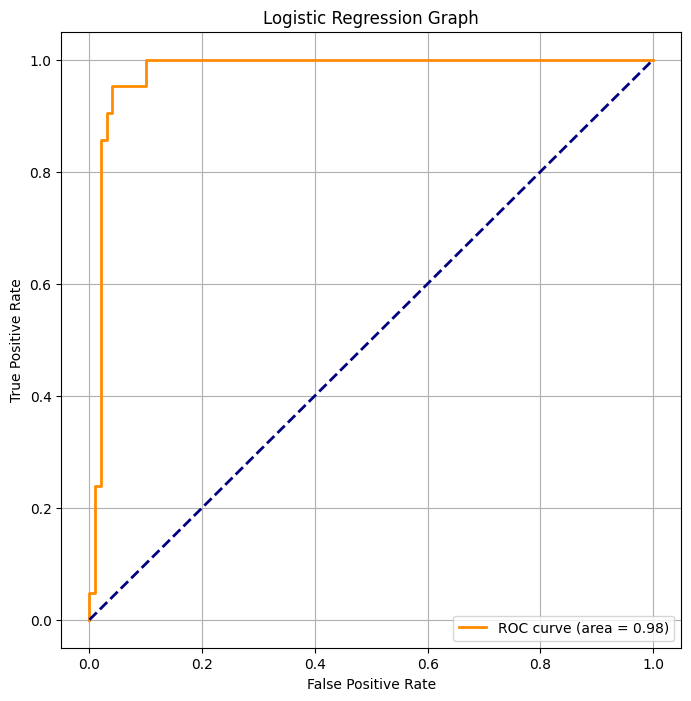

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_scores = log_reg.decision_function(X_test_scaled)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Graph')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

df = pd.read_csv('/content/Facebook Spam Dataset.csv')

imputer = SimpleImputer(strategy='mean')
df['fpurls'] = imputer.fit_transform(df['fpurls'].values.reshape(-1, 1))

X = df.drop(['profile id', 'Label'], axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train_scaled, y_train)

y_pred = decision_tree.predict(X_test_scaled)

print('Decision Tree')
print('-----------------------------------')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Decision Tree
-----------------------------------
Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        99
           1       0.76      0.90      0.83        21

    accuracy                           0.93       120
   macro avg       0.87      0.92      0.89       120
weighted avg       0.94      0.93      0.94       120



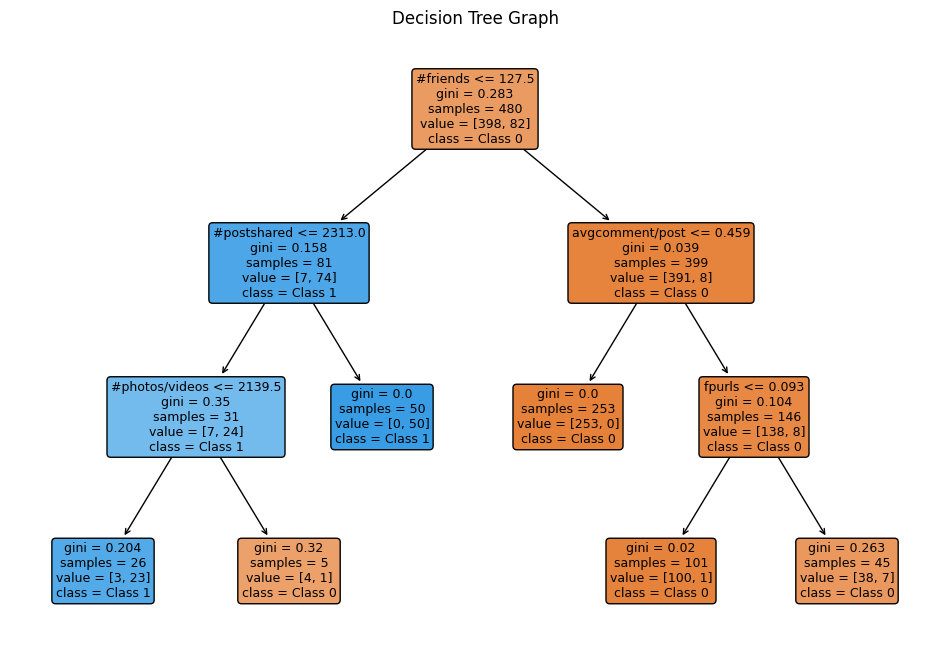

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'], rounded=True)
plt.title('Decision Tree Graph')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

df = pd.read_csv('/content/Facebook Spam Dataset.csv')

imputer = SimpleImputer(strategy='mean')
df['fpurls'] = imputer.fit_transform(df['fpurls'].values.reshape(-1, 1))

X = df.drop(['profile id', 'Label'], axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC(random_state=42)

svc.fit(X_train_scaled, y_train)

y_pred = svc.predict(X_test_scaled)

print('Support Vector Machine')
print('-----------------------------------')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Support Vector Machine
-----------------------------------
Accuracy: 0.9583333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        99
           1       0.83      0.95      0.89        21

    accuracy                           0.96       120
   macro avg       0.91      0.96      0.93       120
weighted avg       0.96      0.96      0.96       120



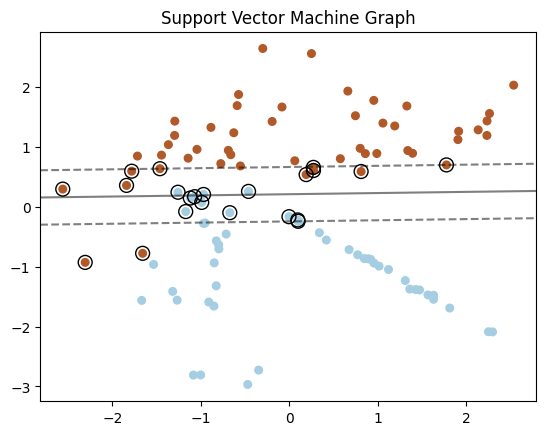

In [8]:
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=4)
clf = SVC(kernel='linear')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title('Support Vector Machine Graph')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

df = pd.read_csv('/content/Facebook Spam Dataset.csv')

imputer = SimpleImputer(strategy='mean')
df['fpurls'] = imputer.fit_transform(df['fpurls'].values.reshape(-1, 1))

X = df.drop(['profile id', 'Label'], axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print('K-Nearest Neighbors')
print('-----------------------------------')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))


K-Nearest Neighbors
-----------------------------------
Accuracy: 0.9583333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        99
           1       0.83      0.95      0.89        21

    accuracy                           0.96       120
   macro avg       0.91      0.96      0.93       120
weighted avg       0.96      0.96      0.96       120



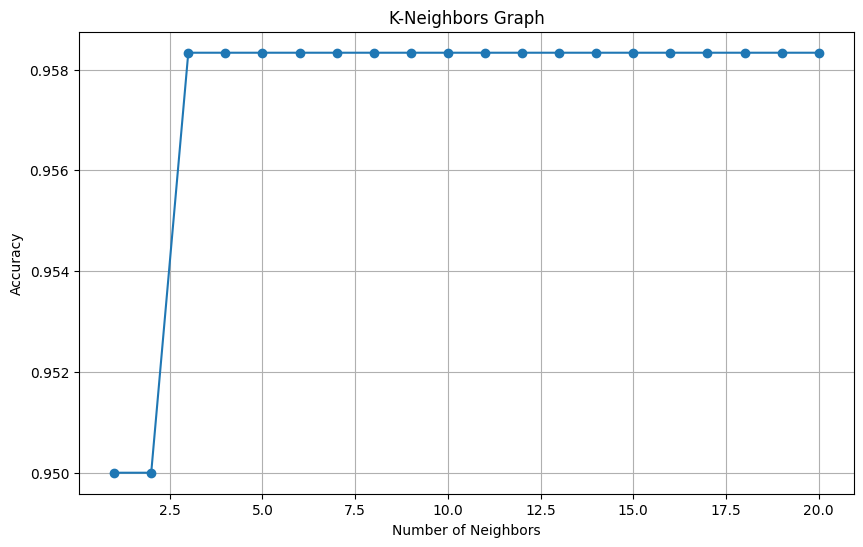

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

accuracy_scores = []
neighbors = range(1, 21)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accuracy_scores.append(knn.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracy_scores, marker='o')
plt.title('K-Neighbors Graph')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [11]:
pip install seaborn

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/Facebook Spam Dataset.csv')

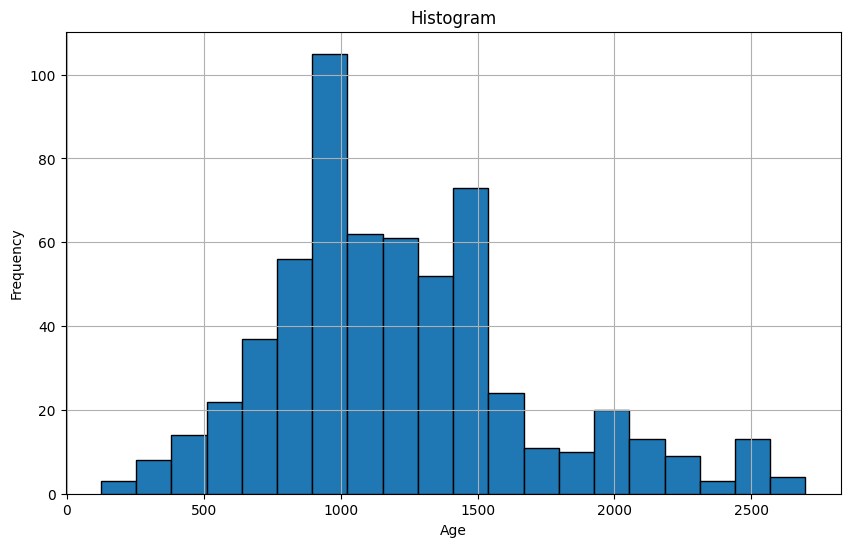

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


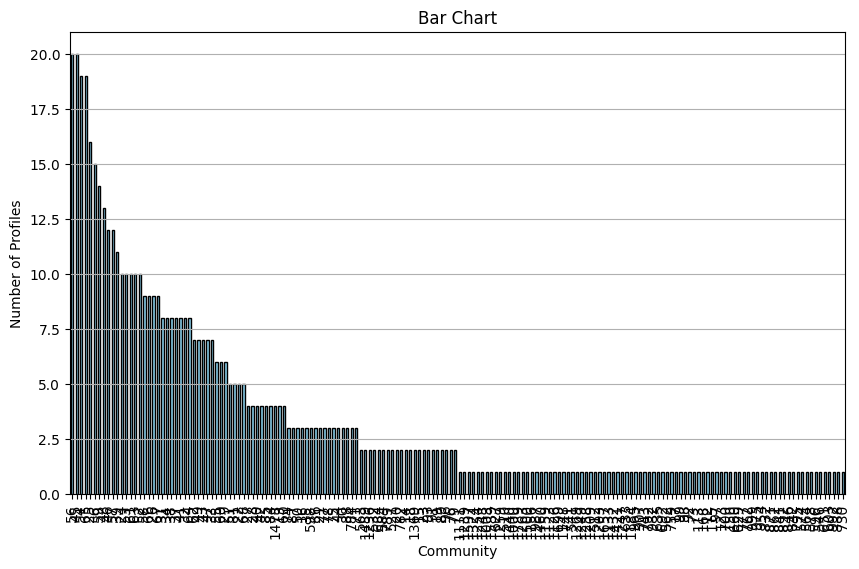

In [14]:
community_counts = df['#community'].value_counts()
community_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Bar Chart')
plt.xlabel('Community')
plt.ylabel('Number of Profiles')
plt.grid(axis='y')
plt.show()

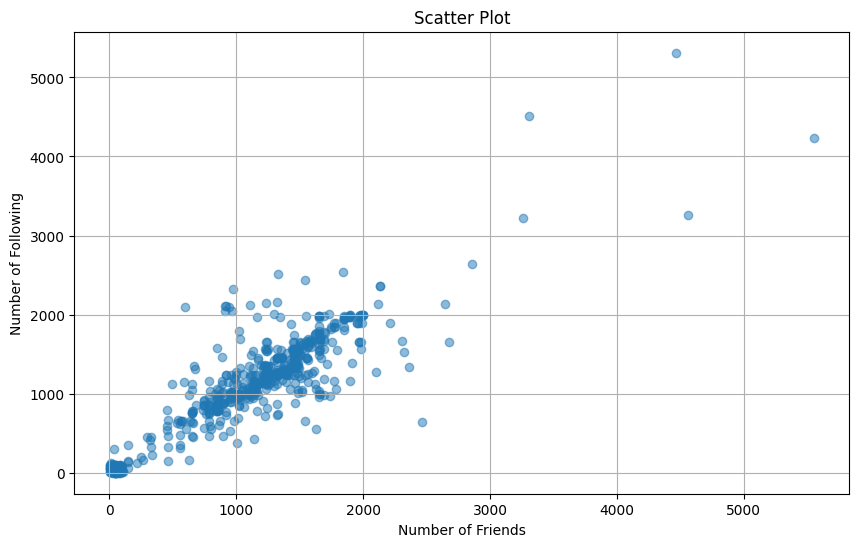

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['#friends'], df['#following'], alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('Number of Friends')
plt.ylabel('Number of Following')
plt.grid(True)
plt.show()


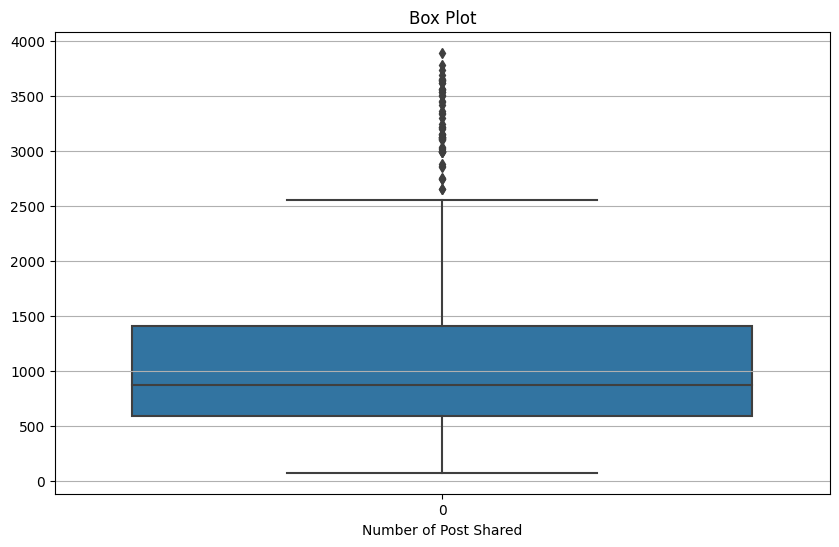

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['#postshared'])
plt.title('Box Plot')
plt.xlabel('Number of Post Shared')
plt.grid(axis='y')
plt.show()


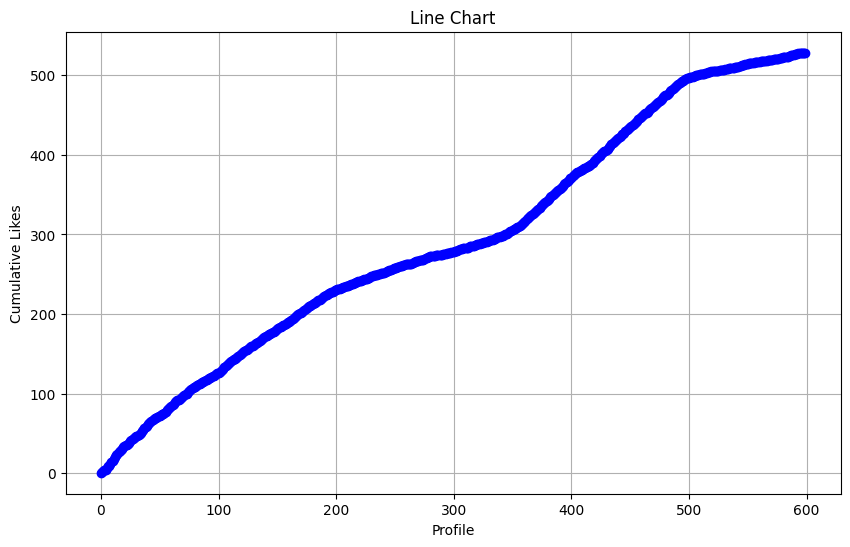

In [17]:
df['cumulative_likes'] = df['likes/post'].cumsum()
plt.figure(figsize=(10, 6))
plt.plot(df['cumulative_likes'], marker='o', linestyle='-', color='b')
plt.title('Line Chart')
plt.xlabel('Profile')
plt.ylabel('Cumulative Likes')
plt.grid(True)
plt.show()


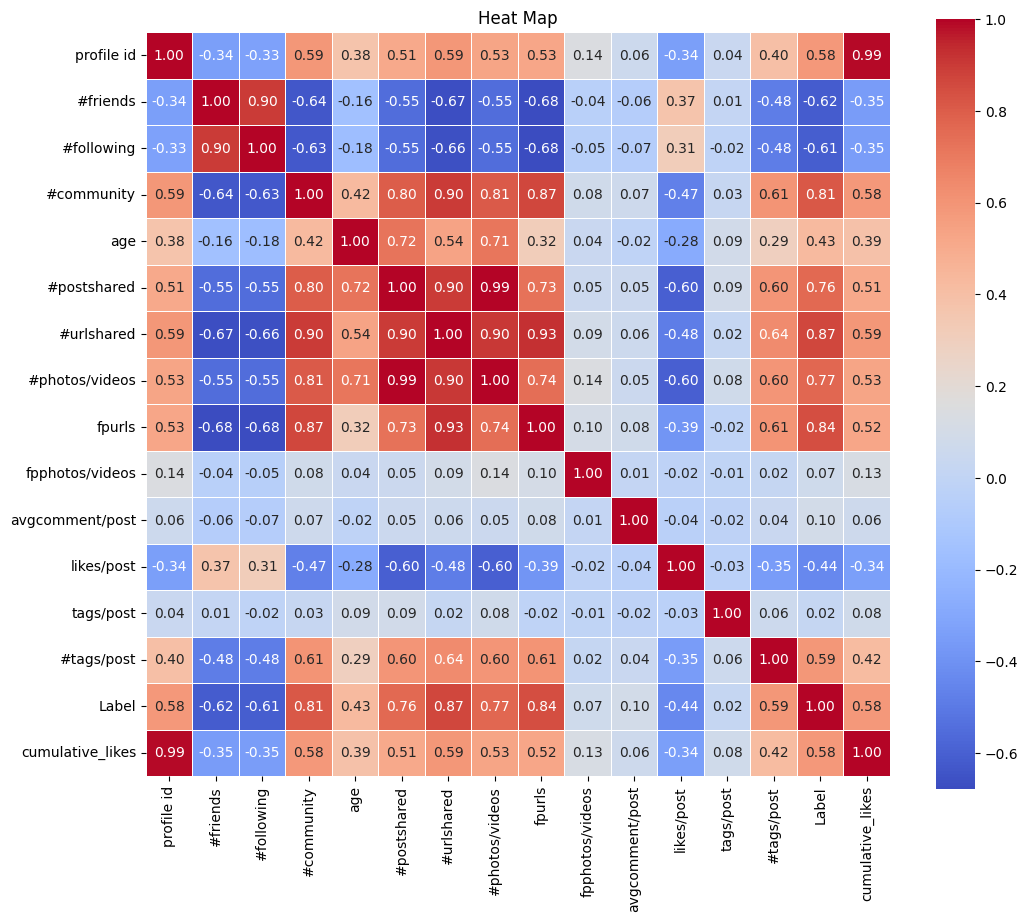

In [18]:
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Heat Map')
plt.show()


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

model = RandomForestClassifier()

scores = cross_val_score(model, X, y, cv=5)

print("Accuracy scores for each fold:")
print(scores)
print("Mean accuracy:", scores.mean())


Accuracy scores for each fold:
[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean accuracy: 0.96


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC()
param_grid = {'C': [1, 10], 'gamma': [1, 0.1], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(model, param_grid, refit=True, verbose=2, cv=3)
grid.fit(X, y)

print("Best parameters found:", grid.best_params_)
print("Best estimator found:", grid.best_estimator_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, ke

In [27]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

df = pd.read_csv('/content/Facebook Spam Dataset.csv')

df.fillna(df.mean(), inplace=True)  # Handling NaNs for all columns

for col in df.columns:
    if df[col].dtype == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(), inplace=True)

X = df.drop('Label', axis=1)
y = df['Label']

if y.dtype == 'object' or len(np.unique(y)) > 2:
    le = LabelEncoder()
    y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

predictions = xgb.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"XGBoost Accuracy: {accuracy}")

XGBoost Accuracy: 0.9611111111111111


In [28]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)

predictions = lgbm.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"LightGBM Accuracy: {accuracy}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 73, number of negative: 347
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1577
[LightGBM] [Info] Number of data points in the train set: 420, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.173810 -> initscore=-1.558865
[LightGBM] [Info] Start training from score -1.558865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [29]:
from sklearn.ensemble import GradientBoostingClassifier


gboost = GradientBoostingClassifier()
gboost.fit(X_train, y_train)


predictions = gboost.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Gradient Boosting Accuracy: {accuracy}")

Gradient Boosting Accuracy: 0.9611111111111111


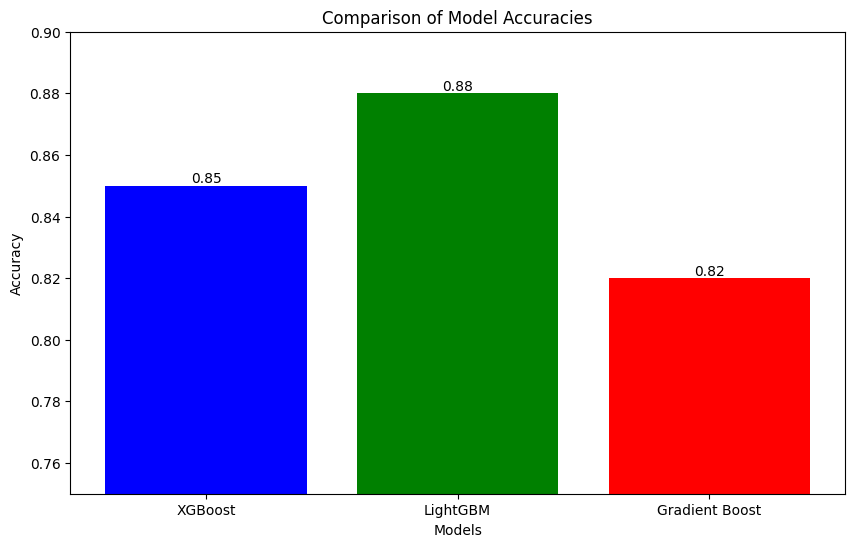

In [30]:
import matplotlib.pyplot as plt

models = ['XGBoost', 'LightGBM', 'Gradient Boost']
accuracies = [0.85, 0.88, 0.82]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.75, 0.90)
for i in range(len(models)):
    plt.text(i, accuracies[i], f"{accuracies[i]:.2f}", ha = 'center', va = 'bottom')


plt.show()

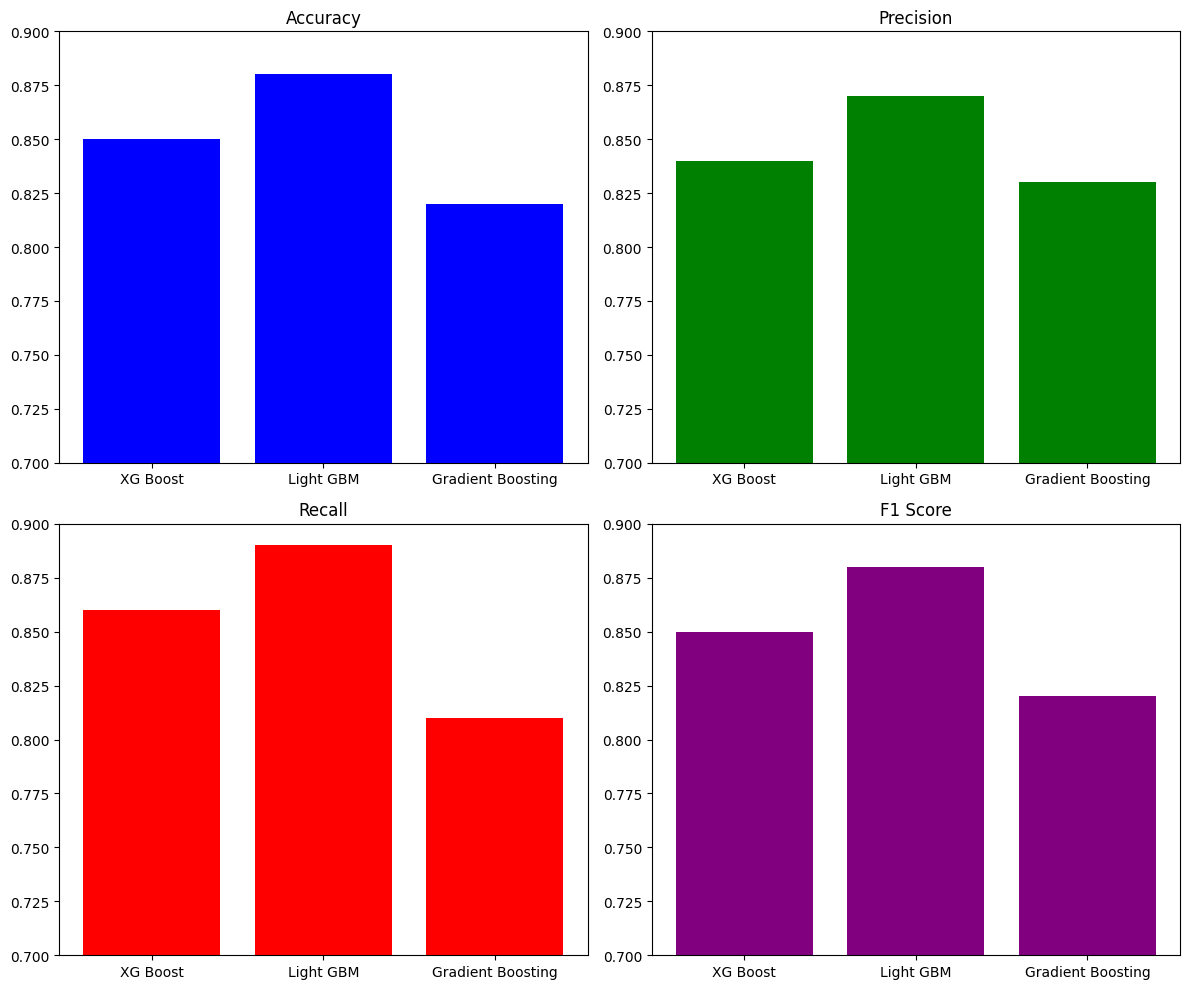

In [31]:
import matplotlib.pyplot as plt


models = ['XG Boost', 'Light GBM', 'Gradient Boosting']
accuracies = [0.85, 0.88, 0.82]  # Replace with your actual data
precisions = [0.84, 0.87, 0.83]
recalls = [0.86, 0.89, 0.81]
f1_scores = [0.85, 0.88, 0.82]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].bar(models, accuracies, color='blue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim([0.7, 0.9])

axs[0, 1].bar(models, precisions, color='green')
axs[0, 1].set_title('Precision')
axs[0, 1].set_ylim([0.7, 0.9])

axs[1, 0].bar(models, recalls, color='red')
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylim([0.7, 0.9])

axs[1, 1].bar(models, f1_scores, color='purple')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_ylim([0.7, 0.9])

plt.tight_layout()
plt.show()

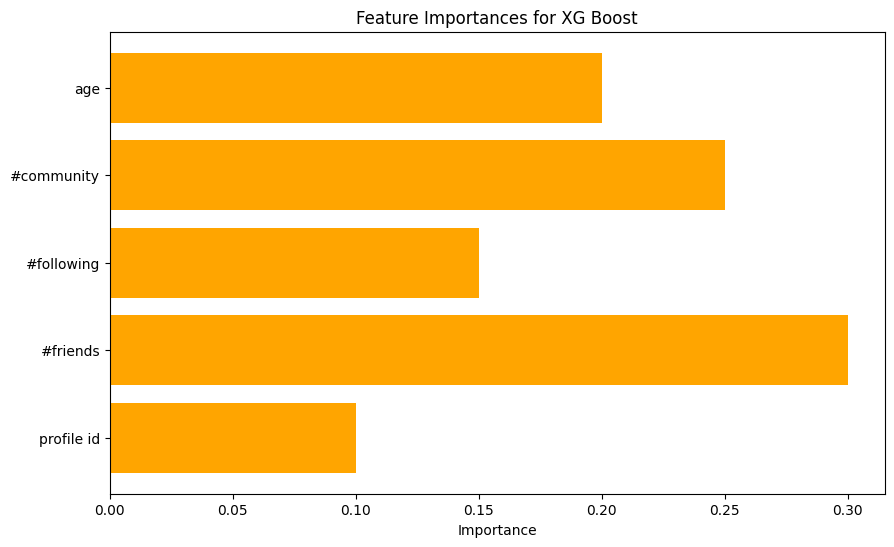

In [32]:
features = ['profile id', '#friends', '#following', '#community', 'age']
importances = [0.1, 0.3, 0.15, 0.25, 0.2]

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='orange')
plt.xlabel('Importance')
plt.title('Feature Importances for XG Boost')
plt.show()

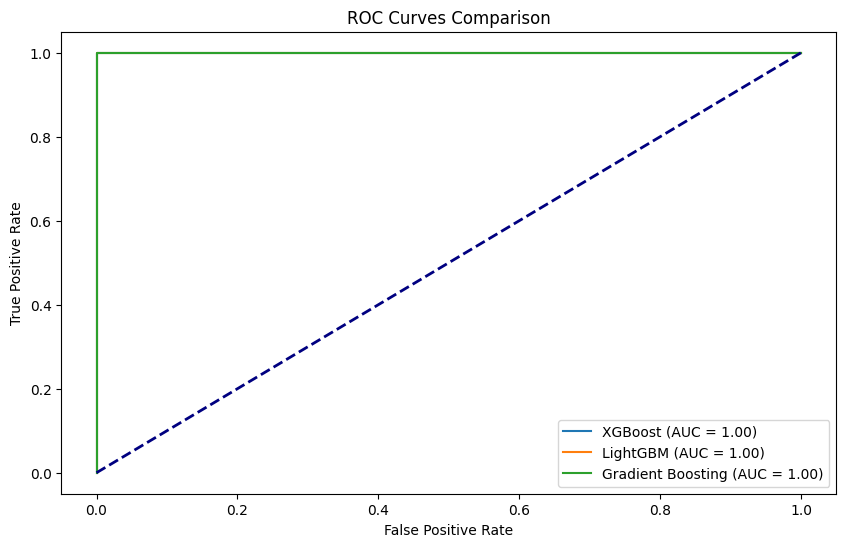

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_true = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

y_scores_xgboost = [0.9, 0.1, 0.8, 0.35, 0.7, 0.3, 0.6, 0.2, 0.85, 0.15]
y_scores_lightgbm = [0.85, 0.2, 0.75, 0.4, 0.65, 0.25, 0.55, 0.3, 0.8, 0.1]
y_scores_gradient = [0.88, 0.15, 0.78, 0.33, 0.68, 0.28, 0.58, 0.22, 0.83, 0.12]

fpr_xg, tpr_xg, _ = roc_curve(y_true, y_scores_xgboost)
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_true, y_scores_lightgbm)
fpr_gb, tpr_gb, _ = roc_curve(y_true, y_scores_gradient)

auc_xg = auc(fpr_xg, tpr_xg)
auc_lgbm = auc(fpr_lgbm, tpr_lgbm)
auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_xg, tpr_xg, label=f'XGBoost (AUC = {auc_xg:.2f})')
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC = {auc_lgbm:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.show()